<a href="https://colab.research.google.com/github/GinuraAdikari/BankChurn/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns


# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLcw/final_dataseto.csv')

# Display the first few rows
print(df.head())
print(df.info())

In [2]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Counting outliers
outliers_below = df[df['age'] < lower_bound].shape[0]
outliers_above = df[df['age'] > upper_bound].shape[0]
total_outliers = outliers_below + outliers_above

print(f"Age Outliers Below: {outliers_below}, Above: {outliers_above}, Total: {total_outliers}")
print(lower_bound)
print(upper_bound)


Age Outliers Below: 0, Above: 468, Total: 468
9.5
69.5


In [3]:
#df['age'] = df['age'].clip(lower=lower_bound, upper=upper_bound)

In [3]:
df.head()

,Unnamed: 0,age,campaign,cons.price.idx,cons.conf.idx,y,contact_recency_frequency,job_grouped_high_end,job_grouped_service,job_grouped_technical,...,month_grouped_Q2,month_grouped_Q3,month_grouped_Q4,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,combined_feature
0,0,56,1,93.994,-36.4,0,0.0,False,True,False,...,True,False,False,True,False,False,False,True,False,1732.319
1,1,57,1,93.994,-36.4,0,0.0,False,True,False,...,True,False,False,True,False,False,False,True,False,1732.319
2,2,37,1,93.994,-36.4,0,0.0,False,True,False,...,True,False,False,True,False,False,False,True,False,1732.319
3,3,40,1,93.994,-36.4,0,0.0,False,False,True,...,True,False,False,True,False,False,False,True,False,1732.319
4,4,56,1,93.994,-36.4,0,0.0,False,True,False,...,True,False,False,True,False,False,False,True,False,1732.319


In [4]:
df.shape

(41176, 33)

In [6]:

# Columns to scale
numerical_columns_new = ['age', 'campaign','contact_recency_frequency','cons.price.idx', 'cons.conf.idx','combined_feature']

scaler = StandardScaler()
df[numerical_columns_new] = scaler.fit_transform(df[numerical_columns_new])

In [2]:

# Columns to scale
numerical_columns_new = ['age', 'campaign', 'contact_recency_frequency',
                         'cons.price.idx', 'cons.conf.idx', 'combined_feature']

# Initialize RobustScaler
scaler = RobustScaler()

# Apply RobustScaler to the selected columns
df[numerical_columns_new] = scaler.fit_transform(df[numerical_columns_new])

In [3]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # Import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [7]:
# Features and target
X = df.drop(columns=['Unnamed: 0', 'y'])  # Drop unnecessary columns
y = df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy = 'auto' , random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [5]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.3 MB/s eta 0:00:00


# Hyperparameter Tuning

In [6]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

# Define the model building function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_layer1', min_value=64, max_value=256, step=32),
                    input_dim=X_train.shape[1]))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(rate=hp.Float('dropout_layer1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units_layer2', min_value=32, max_value=128, step=16)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(rate=hp.Float('dropout_layer2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC()])
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_epochs=30,
    factor=3,
    directory='my_dir',
    project_name='ann_hyperparameter_tuning'
)

# Define the callback for early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Run the hyperparameter search
tuner.search(X_train_resampled, y_train_resampled,
             epochs=30,
             validation_data=(X_test, y_test),
             callbacks=[early_stop],
             batch_size=32)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Optimal number of units in the first dense layer: {best_hps.get('units_layer1')}
Optimal dropout rate for the first dense layer: {best_hps.get('dropout_layer1')}
Optimal number of units in the second dense layer: {best_hps.get('units_layer2')}
Optimal dropout rate for the second dense layer: {best_hps.get('dropout_layer2')}
Optimal learning rate: {best_hps.get('learning_rate')}
""")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train_resampled, y_train_resampled,
                         epochs=50,
                         validation_data=(X_test, y_test),
                         callbacks=[early_stop],
                         batch_size=32)

# Evaluate the best model
results = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1]:.4f}, Test AUC: {results[2]:.4f}")


Trial 90 Complete [00h 00m 44s]
val_accuracy: 0.8873147964477539

Best val_accuracy So Far: 0.8967052698135376
Total elapsed time: 00h 44m 05s

Optimal number of units in the first dense layer: 96
Optimal dropout rate for the first dense layer: 0.5
Optimal number of units in the second dense layer: 112
Optimal dropout rate for the second dense layer: 0.5
Optimal learning rate: 0.0005

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1599/1599 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5005 - auc_3: 0.5002 - loss: 27.1683 - val_accuracy: 0.8873 - val_auc_3: 0.5813 - val_loss: 0.6342
Epoch 2/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5052 - auc_3: 0.5039 - loss: 0.9835 - val_accuracy: 0.2501 - val_auc_3: 0.5492 - val_loss: 0.6958
Epoch 3/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5020 - auc_3: 0.5026 - loss: 0.7649 - val_accuracy: 0.6395 - val_auc_3: 0.5785 - val_loss: 0.6918
Epoch 4/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5030 - auc_3: 0.5041 - loss: 0.7047 - val_accuracy: 0.8358 - val_auc_3: 0.5676 - val_loss: 0.6868
Epoch 5/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5094 - auc_3: 0.5136 - loss: 0.6941 - val_accuracy: 0.8592 - val_auc_3: 0.6311 - val_loss: 0.6782
Epoch 6/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5476 - auc_3: 0.5685 - loss: 0.6847 - val_accuracy: 0.6291 - val_auc_3: 0.6795 - val_loss: 0.6601
Test Accuracy:

# Evaluation Matrics

In [7]:
# Evaluate the model on the training data
train_results = best_model.evaluate(X_train_resampled, y_train_resampled)
train_loss, train_accuracy, train_auc = train_results # unpack the results correctly
print(f"Training Loss: {train_loss}, Training Accuracy: {train_accuracy}, Training AUC: {train_auc}")

# Evaluate the model on the original test data
test_results = best_model.evaluate(X_test, y_test)
test_loss, test_accuracy, test_auc = test_results # unpack the results correctly
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test AUC: {test_auc}")

1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7859 - auc_3: 0.5860 - loss: 0.6502
Training Loss: 0.6950899958610535, Training Accuracy: 0.5, Training AUC: 0.5855958461761475
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8861 - auc_3: 0.5729 - loss: 0.6345
Test Loss: 0.6342491507530212, Test Accuracy: 0.8873147964477539, Test AUC: 0.5813312530517578


In [20]:
from sklearn.metrics import f1_score

y_val_pred_probs = best_model.predict(X_test)
thresholds = [i * 0.01 for i in range(30, 70)]
f1_scores = [f1_score(y_test, (y_val_pred_probs > t).astype(int)) for t in thresholds]
optimal_threshold = thresholds[f1_scores.index(max(f1_scores))]
print(f"Optimal Threshold: {optimal_threshold}")

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Optimal Threshold: 0.51


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = (best_model.predict(X_test) > optimal_threshold).astype(int)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.00      0.01     10961
           1       0.11      1.00      0.20      1392

    accuracy                           0.12     12353
   macro avg       0.54      0.50      0.10     12353
weighted avg       0.87      0.12      0.03     12353

[[   33 10928]
 [    1  1391]]


# Model Building

In [8]:
# Build the ANN model
model = Sequential([
    Dense(96, activation='leaky_relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(112, activation='leaky_relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC()])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluate the model
results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1]:.4f}, Test AUC: {results[2]:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6901 - auc: 0.7481 - loss: 0.5873 - val_accuracy: 0.8050 - val_auc: 0.7930 - val_loss: 0.5132
Epoch 2/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7349 - auc: 0.8003 - loss: 0.5396 - val_accuracy: 0.8196 - val_auc: 0.7911 - val_loss: 0.4872
Epoch 3/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7437 - auc: 0.8148 - loss: 0.5215 - val_accuracy: 0.8102 - val_auc: 0.7862 - val_loss: 0.5103
Epoch 4/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7515 - auc: 0.8204 - loss: 0.5149 - val_accuracy: 0.8156 - val_auc: 0.7830 - val_loss: 0.5079
Epoch 5/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7564 - auc: 0.8276 - loss: 0.5068 - val_accuracy: 0.8208 - val_auc: 0.7831 - val_loss: 0.4847
Epoch 6/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7568 - auc: 0.8280 - loss: 0.5051 - val_accuracy: 0.8307 - val_auc: 0.7781 - val_loss: 0.4798
Epoch 7/50
1599/1599 ━━━━━━━━━━━━━━━━━━

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 96)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 112)                 │          10,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 112)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             113 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,149 (164.65 KB)

 Trainable params: 14,049 (54.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,100 (109.77 KB)

# Evaluation Metrics

In [10]:
# Evaluate the model on the training data
train_results = model.evaluate(X_train_resampled, y_train_resampled)
train_loss, train_accuracy, train_auc = train_results # unpack the results correctly
print(f"Training Loss: {train_loss}, Training Accuracy: {train_accuracy}, Training AUC: {train_auc}")

# Evaluate the model on the original test data
test_results = model.evaluate(X_test, y_test)
test_loss, test_accuracy, test_auc = test_results # unpack the results correctly
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test AUC: {test_auc}")

1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7997 - auc: 0.8229 - loss: 0.4699
Training Loss: 0.4399823844432831, Training Accuracy: 0.7884930968284607, Training AUC: 0.8739427328109741
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7996 - auc: 0.7682 - loss: 0.4922
Test Loss: 0.4890683889389038, Test Accuracy: 0.8023961782455444, Test AUC: 0.7776312232017517


In [20]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_train_pred = (model.predict(X_train_resampled) > 0.5).astype(int)

print(classification_report(y_train_resampled, y_train_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     25576
           1       0.81      0.75      0.78     25576

    accuracy                           0.79     51152
   macro avg       0.79      0.79      0.79     51152
weighted avg       0.79      0.79      0.79     51152

              precision    recall  f1-score   support

           0       0.94      0.83      0.88     10961
           1       0.31      0.62      0.41      1392

    accuracy                           0.80     12353
   macro avg       0.63      0.72      0.65     12353
weighted avg       0.87      0.80      0.83     12353

[[9051 1910]
 [ 531  861]]


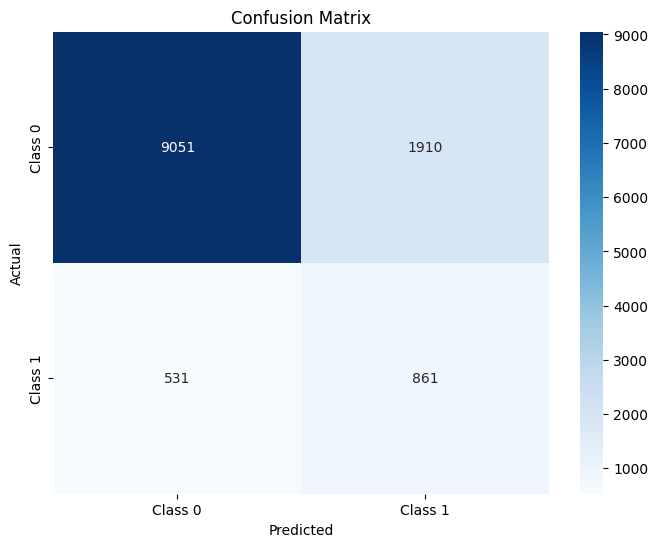

In [21]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:


y_val_pred_probs = model.predict(X_test)
thresholds = [i * 0.01 for i in range(30, 70)]
f1_scores = [f1_score(y_test, (y_val_pred_probs > t).astype(int)) for t in thresholds]
optimal_threshold = thresholds[f1_scores.index(max(f1_scores))]
print(f"Optimal Threshold: {optimal_threshold}")

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Optimal Threshold: 0.64


In [23]:

# Predictions
y_pred = (model.predict(X_test) > optimal_threshold).astype(int)
y_train_pred = (model.predict(X_train_resampled) > optimal_threshold).astype(int)

# Classification report and confusion matrix
print(classification_report(y_train_resampled, y_train_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.72      0.91      0.81     25576
           1       0.88      0.65      0.75     25576

    accuracy                           0.78     51152
   macro avg       0.80      0.78      0.78     51152
weighted avg       0.80      0.78      0.78     51152

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10961
           1       0.41      0.51      0.45      1392

    accuracy                           0.86     12353
   macro avg       0.67      0.71      0.69     12353
weighted avg       0.88      0.86      0.87     12353

[[9960 1001]
 [ 688  704]]
